# Predicting IBD risk from genomic data using machine learning

Author: [Samit Watve](#https://www.linkedin.com/in/samitwatve/) 
    
This project was developed as a capstone project for [BrainStation](https://brainstation.io/)'s Data Science Bootcamp which was conducted virtually from September 28th - December 18th 2020. The goal of this project was to create a machine learning model / pipeline, that is capable of predicting whether a test subject has Inflammatory Bowel Disease (IBD) or will develop IBD in the future **solely** using genomic data (i.e. SNP data).

This script takes inputs from the `GWAS_analysis_OHE.csv` file and builds a KNN model for classifying a patient as healthy or diseased.

Import data science packages

In [1]:
#import data science packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

Read csv into encoded_df

In [2]:
#Read csv into encoded_df
encoded_df = pd.read_csv("GWAS_analysis_OHE.csv")
encoded_df.head()

,Unnamed: 0,Gender,rs3769005_CC,rs3769005_CG,rs3769005_GG,imm_1_67459652_AA,imm_1_67459652_AG,imm_1_67459652_GG,imm_7_51057559_AA,imm_7_51057559_AG,...,rs1375131_AA,rs1375131_AG,rs1375131_GG,rs2563397_AG,rs2563397_GG,1kg_1_241045805_AA,1kg_1_241045805_AG,rs34367277_AG,rs34367277_GG,Affectation
0,6198863118_R01C01,0,0,0,1,0,1,0,0,1,...,1,0,0,0,1,1,0,0,1,0
1,8647968039_R01C02,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,1,0,0,1,0
2,6198863118_R02C01,0,0,0,1,1,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0
3,6198863118_R03C01,1,0,1,0,0,0,1,0,1,...,0,0,1,1,0,0,1,1,0,0
4,8647968039_R02C02,0,0,0,1,1,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0


Reset index to patient id

In [3]:
#Reset index to patient id
encoded_df.rename(columns={"Unnamed: 0":"patient_ID"}, inplace=True)
encoded_df.set_index("patient_ID", inplace= True)
encoded_df.head()

,Gender,rs3769005_CC,rs3769005_CG,rs3769005_GG,imm_1_67459652_AA,imm_1_67459652_AG,imm_1_67459652_GG,imm_7_51057559_AA,imm_7_51057559_AG,imm_7_51057559_GG,...,rs1375131_AA,rs1375131_AG,rs1375131_GG,rs2563397_AG,rs2563397_GG,1kg_1_241045805_AA,1kg_1_241045805_AG,rs34367277_AG,rs34367277_GG,Affectation
patient_ID,,,,,,,,,,,,,,,,,,,,,
6198863118_R01C01,0,0,0,1,0,1,0,0,1,0,...,1,0,0,0,1,1,0,0,1,0
8647968039_R01C02,0,0,0,1,0,1,0,0,0,1,...,1,0,0,0,1,1,0,0,1,0
6198863118_R02C01,0,0,0,1,1,0,0,0,0,1,...,1,0,0,0,1,1,0,0,1,0
6198863118_R03C01,1,0,1,0,0,0,1,0,1,0,...,0,0,1,1,0,0,1,1,0,0
8647968039_R02C02,0,0,0,1,1,0,0,0,0,1,...,1,0,0,0,1,1,0,0,1,0


Shuffle the dataframe so that diseased and healthy patients are mixed up, not clumped together.

<AxesSubplot:ylabel='patient_ID'>

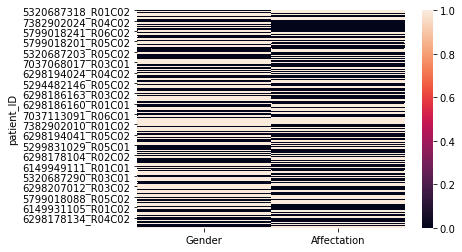

In [4]:
#shuffle the dataframe so that diseased and healthy patients are mixed up, not clumped together
encoded_df = shuffle(encoded_df)
sns.heatmap(encoded_df[["Gender", "Affectation"]])

Generate X and y dataframes for model fitting

In [5]:
#Generate X and y dataframes for model fitting
X_encoded = encoded_df.drop(["Affectation"], axis = 'columns')
y = encoded_df["Affectation"]
print(X_encoded.shape)
print(y.shape)

(2645, 1057)
(2645,)


Split the data set into a train set (85%) and the test set (15%)

In [6]:
#Train test split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.15, random_state=123, stratify = y)

#Print sizes of the split data
print(f"X_train : {X_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_test : {y_test.shape}")

X_train : (2248, 1057)
X_test : (397, 1057)
y_train : (2248,)
y_test : (397,)


Check the stratification ratios

In [7]:
#Check stratification ratios
y_train_strat = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
y_test_strat = len(y_test[y_test == 0]) / len(y_test[y_test == 1])
print(f"y_train : {y_train.value_counts()}")
print('Ratio of 0:1 in y_train: %0.2f' % y_train_strat )
print(f"y_test : {y_test.value_counts()}")
print('Ratio of 0:1 in y_test: %0.2f' % y_test_strat) 

y_train : 0    1391
1     857
Name: Affectation, dtype: int64
Ratio of 0:1 in y_train: 1.62
y_test : 0    246
1    151
Name: Affectation, dtype: int64
Ratio of 0:1 in y_test: 1.63


We will use a grid search method to search over a large hyperparameter space in order to find the model that performs the best.

In [8]:
#Define the model
model = KNeighborsClassifier()

#For use in various print statements later
model_name = str(model).replace("()", "")

#CREATE LISTS OF HYPER_PARAMETERS TO TUNE

#Create list of n_neighbors
n_neighbors = range(1, 21, 2)

#Create list of weights
weights = ['uniform', 'distance']

#Create list of metrics
metric = ['euclidean', 'manhattan', 'minkowski']

#Convert the lists to a dictionary called grid
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

#Define the grid search
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, verbose=1)

#Fit the grid search
grid_result = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.0min finished


Summarize the results

In [9]:
# summarize results
print("Best: %0.2f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%0.2f (%0.2f) with: %r" % (mean, stdev, param))

Best: 0.65 using {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
0.60 (0.02) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.60 (0.02) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.62 (0.02) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.62 (0.02) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.62 (0.02) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.62 (0.02) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.63 (0.01) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.63 (0.01) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.64 (0.01) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.64 (0.01) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.64 (0.02) with: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
0.64 (0.0

Find the model that has the highest accuracy

In [10]:
# Best estimator object
print(f"Model = {grid_result.best_estimator_}")
print(f"Model parameters = {grid_result.best_params_}")

#Score on the test set
print("Accuracy score on the test set = %0.2f" % grid_result.score(X_test, y_test))

#Summarizing and storing the grid search in a dataframe
grid_search_results = pd.DataFrame(grid_result.cv_results_)
grid_search_results = grid_search_results.sort_values(by = 'mean_test_score', ascending = False )

#Output the info to a text file
filename = "model outputs/"+model_name+"_grid_search_results.txt"
f = open(filename, 'w')
print(f"Best performing model = {grid_result.best_estimator_} \n", file = f)
print("Accuracy score on the test set = %0.2f \n" % grid_result.score(X_test, y_test) , file = f)
print(f"Model parameters = {grid_result.best_params_} \n", file = f)
print(grid_search_results, file = f)
f.close()

Model = KNeighborsClassifier(metric='manhattan', n_neighbors=19, weights='distance')
Model parameters = {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
Accuracy score on the test set = 0.62


Calculate and plot receiver operating characteristics (ROC) and calculate area under the curve (AUC)

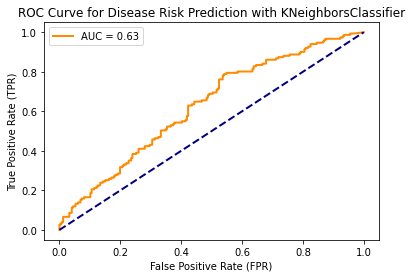

Area under curve (AUC) = 0.63



In [11]:
#calculate and plot receiver operating characteristics (ROC) and calculate area under the curve (AUC)
from sklearn.metrics import roc_curve, roc_auc_score
y_proba = grid_result.predict_proba(X_test)[:,1]
fprs, tprs, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

fig = plt.figure()
plt.plot(fprs, tprs, color='darkorange',
         lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f'ROC Curve for Disease Risk Prediction with {model_name}')
plt.legend(loc="best")

#save ROC curve to file
plt.savefig(f"model outputs/{model_name}_ROC_AUC_curve.pdf")
plt.show()

print('Area under curve (AUC) = %0.2f' % roc_auc)
print()

Generate the confusion matrix

In [12]:
from sklearn.metrics import confusion_matrix

# get best model from grid search
best_model = grid_result.best_estimator_

#fit best model on training data
best_model_result = best_model.fit(X_train, y_train)

#predict y_values by using the .predict method
y_pred = best_model_result.predict(X_test)

#generate confusion matrix
my_confusion_matrix = confusion_matrix(y_test, y_pred)

#print confusion matrix
my_confusion_matrix 

array([[207,  39],
       [113,  38]], dtype=int64)

Saving the confusion matrix to file

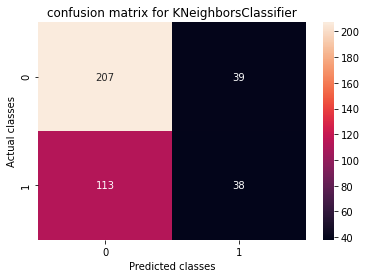

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay as CMD

#plot confusion matrix
sns.heatmap(my_confusion_matrix, annot=True, fmt = '.0f')
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.title(f'confusion matrix for {model_name}')

#save confusion matrix to file
plt.savefig(f"model outputs/{model_name}_confusion_matrix.pdf")
plt.show()

Save the classification report to file

In [14]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)

#save classification report to file
filename = "model outputs/"+str(model_name)+"_classification_report.txt"
f = open(filename, 'w')
print(f"Classification report for {str(model_name)} \n", file=f)
print(report_initial, file = f)
f.close()

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       246
           1       0.49      0.25      0.33       151

    accuracy                           0.62       397
   macro avg       0.57      0.55      0.53       397
weighted avg       0.59      0.62      0.58       397

